In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For creating data
from pyemittance.optics import quad_rmat_mat2, propagate_sigma

# Import pyemittance modules
# Handles I/O of data
from pyemittance.observer import Observer
# Handles optics and emittance/bmag calc
from pyemittance.emittance_calc import EmitCalc

# Create data

In [2]:
# Some beam covariance matrix
EMIT = 1e-9
BETA_X = 10
ALPHA_X = -1
GAMMA_X = (1+ALPHA_X**2)/BETA_X
SIGMA_X = np.sqrt(EMIT*BETA_X)
SIGMA_PX = np.sqrt(EMIT*GAMMA_X)
COV_X__PX = -ALPHA_X*EMIT


SIGMA_11 = SIGMA_X**2
SIGMA_12 = COV_X__PX
SIGMA_22 = SIGMA_PX**2

SIGMA0 = np.array([[SIGMA_11, SIGMA_12], [SIGMA_12, SIGMA_22]])

In [3]:
emit_calc = EmitCalc()

def beam_size_meas(kL, sigma0, Ltot=2.2, Lquad=0):
    mat2 = quad_rmat_mat2(kL, Lquad=Lquad)
    sigma1 = propagate_sigma(sigma0, mat2)
    return np.sqrt(sigma1[0,0])

def model(kL):
    return beam_size_meas(kL, SIGMA0, Ltot=2.26, Lquad=0.108)

kLlist = np.linspace(0.2, 0.7, 10)

# Make the data
meas =  np.array([model(k) for k in kLlist])

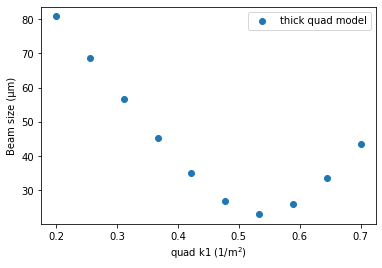

In [4]:
plt.scatter(kLlist, meas*1e6, label='thick quad model')
plt.xlabel(r'quad k1 (1/m$^2$)')
plt.ylabel('Beam size (µm)')
plt.legend()

# Fit data w/ PyEmittance: this can be used with any given dataset
Units needed: 
- kGauss for quadrupole strengths
- meters for beam sizes and beam sizes errors

- returns emittance in m*rad

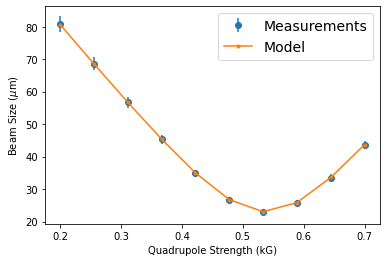

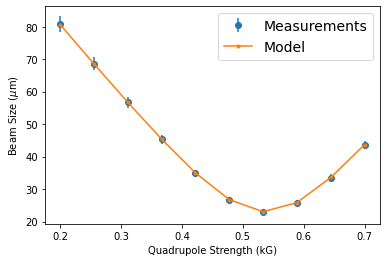

{'nemitx': 1.1733253878383434e-06,
 'nemity': 1.1733253878383434e-06,
 'nemitx_err': 2.331865862605872e-08,
 'nemity_err': 2.331865862605872e-08,
 'nemit': None,
 'nemit_err': None,
 'bmagx': None,
 'bmagy': None,
 'bmagx_err': None,
 'bmagy_err': None,
 'opt_q_x': None,
 'opt_q_y': None,
 'quadvalsx': [0.2,
  0.25555555555555554,
  0.3111111111111111,
  0.3666666666666667,
  0.4222222222222222,
  0.4777777777777778,
  0.5333333333333333,
  0.5888888888888888,
  0.6444444444444444,
  0.7],
 'beamsizesx': [8.078981084043802e-05,
  6.859816262759632e-05,
  5.6707770179325505e-05,
  4.5334684264821755e-05,
  3.495928358934615e-05,
  2.6731769519479044e-05,
  2.3034979932358345e-05,
  2.5851397939242495e-05,
  3.355177979658439e-05,
  4.360021646817196e-05],
 'beamsizeserrx': [2.4236943252131404e-06,
  2.0579448788278898e-06,
  1.7012331053797651e-06,
  1.3600405279446527e-06,
  1.0487785076803844e-06,
  8.019530855843713e-07,
  6.910493979707503e-07,
  7.755419381772748e-07,
  1.006553393

In [5]:
# Observer class handles all I/O
# avoids repeating measurements within an emittance calc
ef = EmitCalc({'x': kLlist,'y': kLlist},
              {'x': meas ,'y': meas},
              {'x': meas*0.03 ,'y': meas*0.03}
             )
ef.plot = True
ef.save_runs = False

ef.get_emit()


ef.out_dict

In [6]:
ef = EmitCalc({'x': kLlist,'y': kLlist},
              {'x': meas ,'y': meas},
              {'x': meas*0.03 ,'y': meas*0.03}
             )
ef.calc_bmag = True 
ef.save_runs = False


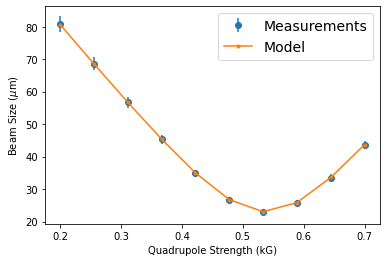

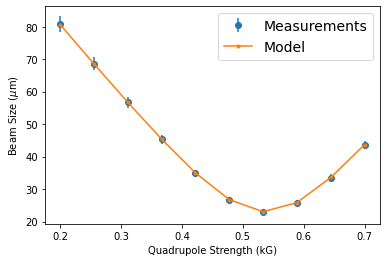

{'nemitx': 1.1733253878383434e-06,
 'nemity': 1.1733253878383434e-06,
 'nemitx_err': 2.331865862605872e-08,
 'nemity_err': 2.331865862605872e-08,
 'nemit': None,
 'nemit_err': None,
 'bmagx': 4.057961241777015,
 'bmagy': 4.061644963098544,
 'bmagx_err': 0.08064788667742774,
 'bmagy_err': 0.08072109692316183,
 'opt_q_x': 0.2,
 'opt_q_y': 0.2,
 'quadvalsx': [0.2,
  0.25555555555555554,
  0.3111111111111111,
  0.3666666666666667,
  0.4222222222222222,
  0.4777777777777778,
  0.5333333333333333,
  0.5888888888888888,
  0.6444444444444444,
  0.7],
 'beamsizesx': [8.078981084043802e-05,
  6.859816262759632e-05,
  5.6707770179325505e-05,
  4.5334684264821755e-05,
  3.495928358934615e-05,
  2.6731769519479044e-05,
  2.3034979932358345e-05,
  2.5851397939242495e-05,
  3.355177979658439e-05,
  4.360021646817196e-05],
 'beamsizeserrx': [2.4236943252131404e-06,
  2.0579448788278898e-06,
  1.7012331053797651e-06,
  1.3600405279446527e-06,
  1.0487785076803844e-06,
  8.019530855843713e-07,
  6.91049

In [7]:
ef.plot = True
ef.get_emit()